# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)


## Load dữ liệu & thống kê tổng quan

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Robust sys.path so `src` is importable
p = Path.cwd()
for _ in range(6):
    if (p / 'src').exists():
        sys.path.insert(0, str(p))
        break
    p = p.parent
else:
    sys.path.insert(0, str(Path.cwd()))

from src.preprocessing import robust_read_processed, clean_numeric_columns

# Load processed dataset (prefer canonical data/processed_data.csv)
try:
    df, sep = robust_read_processed('data/processed_data.csv')
    print('Loaded processed_data.csv with sep', sep)
except FileNotFoundError:
    # Fallback: try sample
    df, sep = robust_read_processed('data/sample/processed_sample.csv')
    print('Loaded sample processed file with sep', sep)

# Normalize numeric columns
df = clean_numeric_columns(df, cols=['TOTALBASKET','UNITPRICE','TOTALPRICE','AMOUNT'])

# Sample display
df.head()

Loaded processed_data.csv with sep data/processed_data.csv


,ORDERID,ORDERDETAILID,AMOUNT,UNITPRICE,TOTALPRICE,ITEMID,ITEMCODE,BRANCH_ID,DATE_,USERID,...,USERGENDER,USERBIRTHDATE,REGION,CITY,TOWN,DISTRICT,ADDRESSTEXT,Year,Month,Age
0,4316432,21584356,5,59.40,176.15,15973,27425,56-AN1,NaN,30892,...,M,1957-09-07,Ic Anadolu,Ankara,CANKAYA,MUTLUKENT MAH.,MUTLUKENT MAH. 1986. SOKAK 06800 CANKAYA/ANKARA,NaN,NaN,69
1,6788624,33953557,1,34.55,26.01,15934,27386,56-AN1,NaN,71967,...,M,1953-07-03,Ic Anadolu,Ankara,CANKAYA,KIRKKONAKLAR MAH.,KIRKKONAKLAR MAH. 361. SOKAK 06610 CANKAYA/A...,NaN,NaN,73
2,3377453,16887270,2,59.50,76.32,17678,28033,56-AN4,2021-01-04,55698,...,F,1991-02-13,Ic Anadolu,Ankara,KECIOREN,GUCLUKAYA MAH.,GUCLUKAYA MAH. KEREM SOKAK 06310 KECIOREN/AN...,2021.0,1.0,35
3,6141661,30714643,8,32.45,242.40,7449,22972,56-AN1,NaN,19596,...,F,1996-11-12,Ic Anadolu,Ankara,MAMAK,EGE MAH.,EGE MAH. 758. SOKAK 06480 MAMAK/ANKARA,NaN,NaN,30
4,3519105,17594071,7,64.50,392.70,22967,44770,56-AN4,NaN,37719,...,F,1993-09-04,Ic Anadolu,Ankara,ETIMESGUT,BAGLICA MAH.,BAGLICA MAH. 1000. SOKAK 06790 ETIMESGUT/ANKARA,NaN,NaN,33


In [38]:
# Convert DATE_ to datetime early on to avoid type errors
import pandas as pd
df['DATE_'] = pd.to_datetime(df['DATE_'], errors='coerce')
print(f"Total records: {len(df)}")
print(f"Number of missing dates: {df['DATE_'].isna().sum()}")

Total records: 59997
Number of missing dates: 36131


In [40]:
df.shape

(59997, 24)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59997 entries, 0 to 59996
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ORDERID        59997 non-null  int64         
 1   ORDERDETAILID  59997 non-null  int64         
 2   AMOUNT         59997 non-null  int64         
 3   UNITPRICE      59997 non-null  float64       
 4   TOTALPRICE     59997 non-null  float64       
 5   ITEMID         59997 non-null  int64         
 6   ITEMCODE       59997 non-null  int64         
 7   BRANCH_ID      59997 non-null  object        
 8   DATE_          23866 non-null  datetime64[ns]
 9   USERID         59997 non-null  int64         
 10  NAMESURNAME    59997 non-null  object        
 11  TOTALBASKET    59997 non-null  float64       
 12  USERNAME_      59997 non-null  object        
 13  STATUS_        59997 non-null  int64         
 14  USERGENDER     59997 non-null  object        
 15  USERBIRTHDATE  5999

Thống kê mô tả dữ liệu số

In [42]:
df.describe()


,ORDERID,ORDERDETAILID,AMOUNT,UNITPRICE,TOTALPRICE,ITEMID,ITEMCODE,DATE_,USERID,TOTALBASKET,STATUS_,Year,Month,Age
count,5.999700e+04,5.999700e+04,59997.000000,59997.000000,59997.000000,59997.000000,59997.000000,23866,59997.000000,59997.000000,59997.0,23866.000000,23866.000000,59997.000000
mean,5.099344e+06,2.550147e+07,4.480691,64.551570,253.362761,13455.030235,22125.494641,2022-05-05 14:05:48.143803136,50475.226345,1609.058689,1.0,2021.865792,6.566287,51.389053
min,5.430000e+02,2.641000e+03,1.000000,0.000000,0.000000,1.000000,5.000000,2021-01-01 00:00:00,4.000000,0.000000,1.0,2021.000000,1.000000,27.000000
25%,2.565370e+06,1.282900e+07,2.000000,15.540000,42.480000,6723.000000,11303.000000,2021-08-11 00:00:00,25694.000000,709.220000,1.0,2021.000000,4.000000,39.000000
50%,5.113504e+06,2.557190e+07,4.000000,35.700000,115.220000,13459.000000,21974.000000,2022-05-03 00:00:00,50759.000000,1275.970000,1.0,2022.000000,7.000000,51.000000
75%,7.599804e+06,3.801074e+07,6.000000,77.950000,286.640000,20239.000000,32492.000000,2022-12-09 00:00:00,75374.000000,2106.750000,1.0,2022.000000,9.000000,64.000000
max,1.023502e+07,5.118413e+07,8.000000,6302.300000,54188.080000,27000.000000,45157.000000,2023-12-08 00:00:00,99985.000000,54953.500000,1.0,2023.000000,12.000000,76.000000
std,2.939731e+06,1.470242e+07,2.295771,114.303261,543.610686,7800.104505,12549.383918,NaN,28883.870633,1536.350467,0.0,0.772433,3.430710,14.464772


## Tạo biến target & kiểm tra phân bố

In [43]:
ALPHA = 0.7

df['ESTIMATED_COST'] = df['UNITPRICE'] * df['AMOUNT'] * ALPHA
df['PROFIT'] = df['TOTALPRICE'] - df['ESTIMATED_COST']
df['IS_PROFIT'] = (df['PROFIT'] > 0).astype(int)

df['IS_PROFIT'].value_counts(normalize=True)


IS_PROFIT
1    0.707519
0    0.292481
Name: proportion, dtype: float64

## Biểu đồ

1. Biểu đồ Phân bố đơn hàng sinh lời

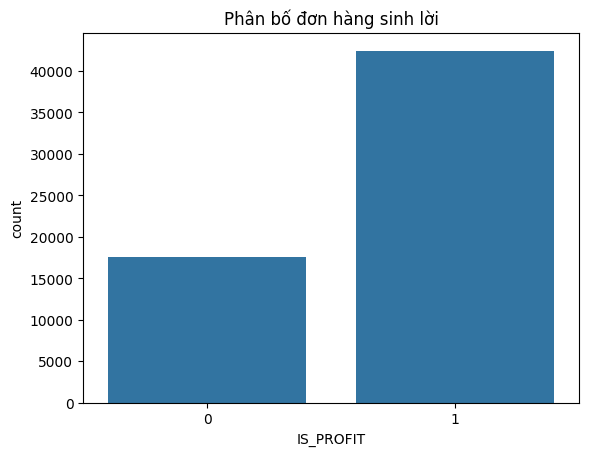

In [44]:
sns.countplot(x='IS_PROFIT', data=df)
plt.title("Phân bố đơn hàng sinh lời")
plt.show()


## Phân tích mối quan hệ giữa biến số & sinh lời

1. Số lượng mua (AMOUNT)

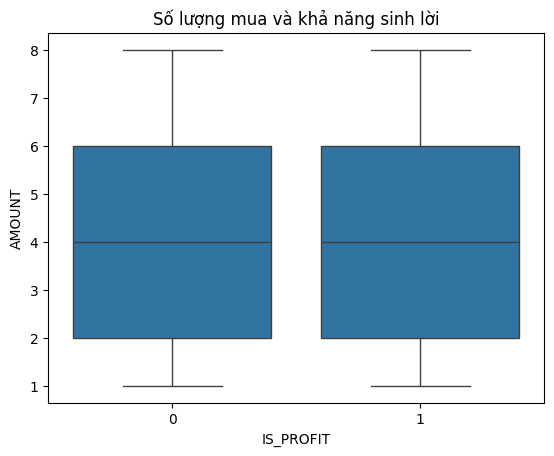

In [45]:
sns.boxplot(x='IS_PROFIT', y='AMOUNT', data=df)
plt.title("Số lượng mua và khả năng sinh lời")
plt.show()

2. Đơn giá (UNITPRICE)

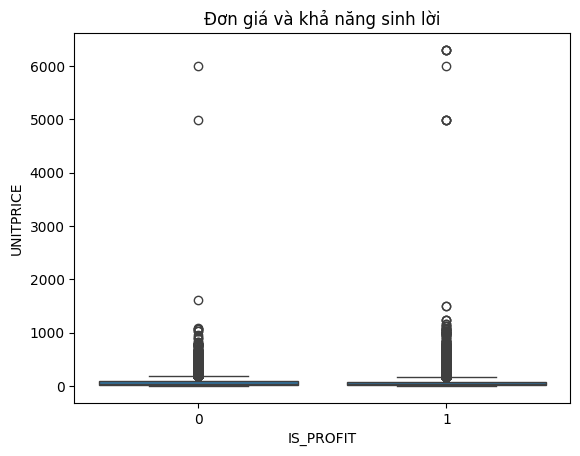

In [46]:
sns.boxplot(x='IS_PROFIT', y='UNITPRICE', data=df)
plt.title("Đơn giá và khả năng sinh lời")
plt.show()


3. Tuổi khách hàng (Age)

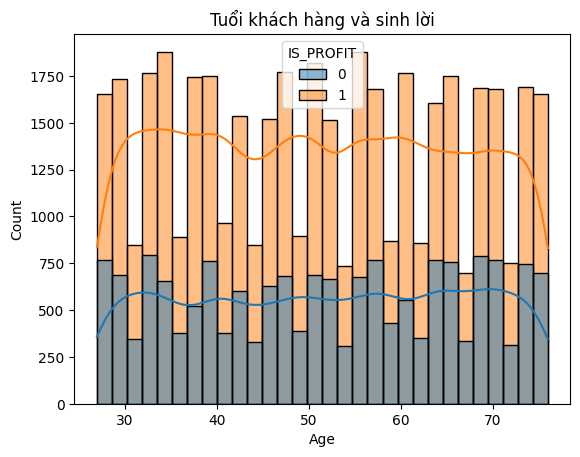

In [47]:
sns.histplot(data=df, x='Age', hue='IS_PROFIT', bins=30, kde=True)
plt.title("Tuổi khách hàng và sinh lời")
plt.show()


## Phân tích yếu tố thời gian

1. Theo tháng

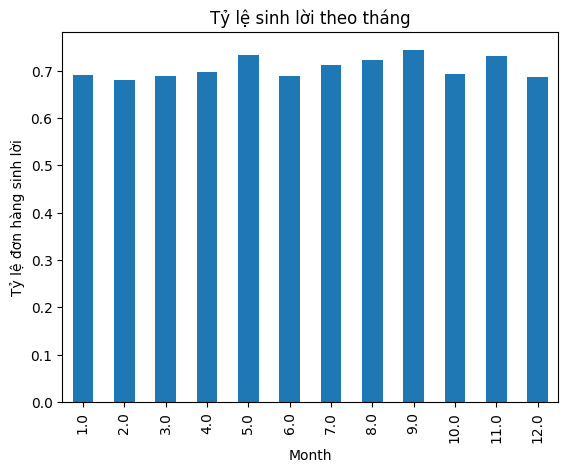

In [48]:
profit_by_month = df.groupby('Month')['IS_PROFIT'].mean()

profit_by_month.plot(kind='bar')
plt.ylabel("Tỷ lệ đơn hàng sinh lời")
plt.title("Tỷ lệ sinh lời theo tháng")
plt.show()


2. Theo Năm

Text(0.5, 1.0, 'Số lượng đơn hàng theo năm')

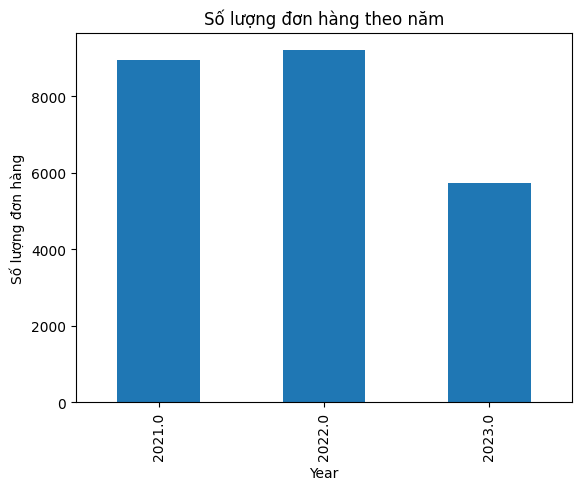

In [49]:
orders_by_year = df['Year'].value_counts().sort_index()

orders_by_year.plot(kind='bar')
plt.ylabel("Số lượng đơn hàng")
plt.title("Số lượng đơn hàng theo năm")

## Phân tích theo địa lý

1. Theo thành phố

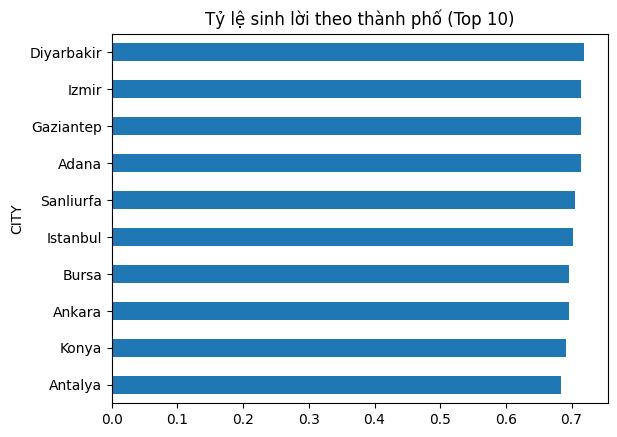

In [50]:
top_cities = df['CITY'].value_counts().head(10).index

city_profit = df[df['CITY'].isin(top_cities)].groupby('CITY')['IS_PROFIT'].mean()

city_profit.sort_values().plot(kind='barh')
plt.title("Tỷ lệ sinh lời theo thành phố (Top 10)")
plt.show()


## Ma trận tương quan

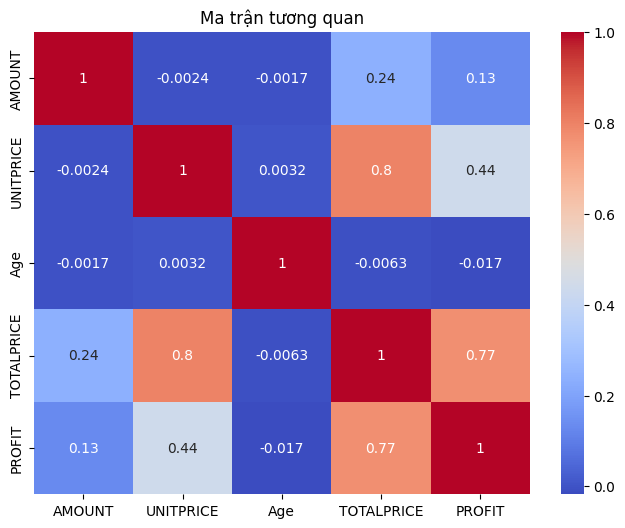

In [51]:
numeric_cols = ['AMOUNT', 'UNITPRICE', 'Age', 'TOTALPRICE', 'PROFIT']

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()


In [52]:
df.columns

Index(['ORDERID', 'ORDERDETAILID', 'AMOUNT', 'UNITPRICE', 'TOTALPRICE',
       'ITEMID', 'ITEMCODE', 'BRANCH_ID', 'DATE_', 'USERID', 'NAMESURNAME',
       'TOTALBASKET', 'USERNAME_', 'STATUS_', 'USERGENDER', 'USERBIRTHDATE',
       'REGION', 'CITY', 'TOWN', 'DISTRICT', 'ADDRESSTEXT', 'Year', 'Month',
       'Age', 'ESTIMATED_COST', 'PROFIT', 'IS_PROFIT'],
      dtype='object')

In [53]:
df.columns = df.columns.str.upper().str.strip()
df.columns

Index(['ORDERID', 'ORDERDETAILID', 'AMOUNT', 'UNITPRICE', 'TOTALPRICE',
       'ITEMID', 'ITEMCODE', 'BRANCH_ID', 'DATE_', 'USERID', 'NAMESURNAME',
       'TOTALBASKET', 'USERNAME_', 'STATUS_', 'USERGENDER', 'USERBIRTHDATE',
       'REGION', 'CITY', 'TOWN', 'DISTRICT', 'ADDRESSTEXT', 'YEAR', 'MONTH',
       'AGE', 'ESTIMATED_COST', 'PROFIT', 'IS_PROFIT'],
      dtype='object')

# RFM


In [91]:
# Filter out rows with missing DATE_ for RFM analysis
df_rfm_clean = df.dropna(subset=["DATE_"]).copy()

if not df_rfm_clean.empty:
    # 1. Set reference date
    reference_date = df_rfm_clean["DATE_"].max() - pd.Timedelta(days=365)
    
    # 2. Historical Data (for Features)
    past_df = df_rfm_clean[df_rfm_clean["DATE_"] <= reference_date].copy()
    
    # Create RFM features
    rfm = past_df.groupby("USERID").agg(
        Recency=("DATE_", lambda x: (reference_date - x.max()).days),
        Frequency=("ORDERID", "nunique"),
        Monetary=("TOTALPRICE", "sum"),
        AvgBasketSize=("TOTALPRICE", "mean"),
        NumItems=("ITEMID", "nunique")
    ).reset_index()
    
    # 3. Future Data (for Labels - Target 90 days)
    future_df = df_rfm_clean[(df_rfm_clean["DATE_"] > reference_date) & 
                   (df_rfm_clean["DATE_"] <= reference_date + pd.Timedelta(days=90))].copy()
    
    future_summary = future_df.groupby("USERID", as_index=False).agg(
        FutureOrders90=("ORDERID", "nunique"),
        FutureTotal90=("TOTALPRICE", "sum")
    )
    
    # 4. Merge and Handle Labels
    rfm = rfm.merge(future_summary, on="USERID", how="left").fillna(0)
    rfm["PurchaseNext90"] = (rfm["FutureOrders90"] > 0).astype(int)
    rfm["Churn90"] = (rfm["FutureOrders90"] == 0).astype(int)
    
    # CLV 90 day labels
    import numpy as np
    rfm["Frequency_adj"] = rfm["Frequency"].replace(0,1)
    rfm["CLV90_raw"] = rfm["FutureTotal90"]
    rfm["CLV90_capped"] = np.clip(rfm["CLV90_raw"], 0, rfm["CLV90_raw"].quantile(0.99))
    rfm["CLV90_log"] = np.log1p(rfm["CLV90_capped"])
    
    print(f"RFM table created with {len(rfm)} users.")
    print("PurchaseNext90 value counts:\n", rfm["PurchaseNext90"].value_counts())
else:
    print("No valid dates found for RFM calculation.")
    rfm = pd.DataFrame()


RFM table created with 3533 users.
PurchaseNext90 value counts:
 PurchaseNext90
0    3517
1      16
Name: count, dtype: int64


# Tạo nhãn Predict


In [58]:
print("PurchaseNext90 value counts:\n", rfm["PurchaseNext90"].value_counts())
print("Churn90 value counts:\n", rfm["Churn90"].value_counts())

PurchaseNext90 value counts:
 PurchaseNext90
0    3517
1      16
Name: count, dtype: int64
Churn90 value counts:
 Churn90
1    3517
0      16
Name: count, dtype: int64


# Phân cụm

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Tính toán các chỉ số RFM
df_rfm = df.copy()
df_rfm['DATE_'] = pd.to_datetime(df_rfm['DATE_'], dayfirst=True)
today = df_rfm['DATE_'].max()

rfm_data = df_rfm.groupby('USERID').agg({
    'DATE_': lambda x: (today - x.max()).days, # Recency
    'ORDERID': 'count',                        # Frequency
    'TOTALPRICE': 'sum'                        # Monetary
}).reset_index()

rfm_data.columns = ['USERID', 'Recency', 'Frequency', 'Monetary']

# 2. Xử lý dữ liệu
rfm_data = rfm_data.fillna(0)

# 3. Chuẩn hóa dữ liệu (Training preparation)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# 4. Huấn luyện mô hình KMeans
# Bạn có thể thay đổi n_clusters tùy theo mục tiêu phân nhóm
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 5. Xem kết quả thống kê các cụm
cluster_stats = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'USERID': 'count'
}).reset_index()

print(cluster_stats)

   Cluster     Recency  Frequency     Monetary  USERID
0        0   50.445493   7.213836  1634.884264    3816
1        1   46.253148   2.693395   552.154605    3891
2        2  240.259300   9.438731  4623.323414     914
3        3  780.498892   4.934269   955.737097    2708


# Huấn luyện mô hình





In [93]:
target = 'IS_PROFIT'

features = [
    'AMOUNT',
    'UNITPRICE',
    'AGE',
    'MONTH',
    'CITY',
    'DISTRICT',
    'ITEMCODE',
    'BRANCH_ID'
]

X = df[features]
y = df[target]


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = [
    'AMOUNT',
    'UNITPRICE',
    'AGE',
    'MONTH'
]

categorical_features = [
    'CITY',
    'DISTRICT',
    'ITEMCODE',
    'BRANCH_ID'
]

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


## 1. Random Forest

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=200,
            class_weight='balanced',
            max_depth=12,
            random_state=42,
            n_jobs=-1
        ))
    ]
)




rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.52      0.39      0.45      3510
           1       0.77      0.85      0.81      8490

    accuracy                           0.72     12000
   macro avg       0.65      0.62      0.63     12000
weighted avg       0.70      0.72      0.70     12000

[[1367 2143]
 [1252 7238]]


In [61]:
rf_model = rf_pipeline.named_steps['model']
tree = rf_model.estimators_[0]

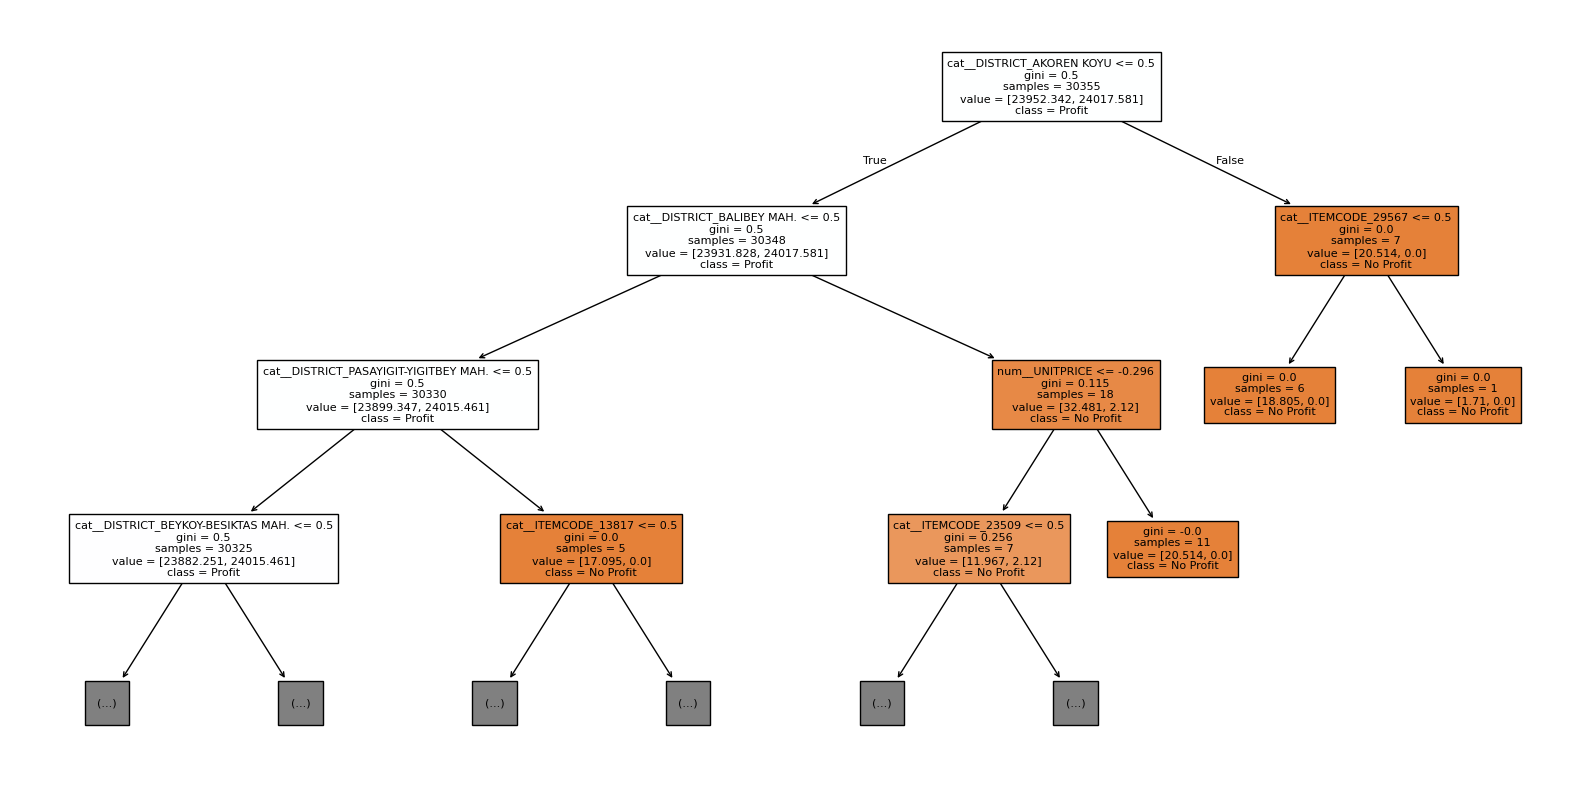

In [62]:
from sklearn.tree import plot_tree

tree = rf_model.estimators_[0]
feature_names = rf_pipeline.named_steps['preprocess'].get_feature_names_out()
plt.figure(figsize=(20, 10))

plot_tree(
    tree,
    feature_names=feature_names,
    class_names=['No Profit', 'Profit'],  # sửa theo nhãn y của bạn
    filled=True,
    max_depth=3,   # CHỈ VẼ 3 TẦNG
    fontsize=8
)

plt.show()


## 2. XGBoost

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=ratio,
    class_weight='balanced',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', xgb_model)
    ]
)
xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)


print("XGBOOST CLASSIFIER")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:31:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST CLASSIFIER
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      3510
           1       0.78      0.77      0.77      8490

    accuracy                           0.68     12000
   macro avg       0.62      0.62      0.62     12000
weighted avg       0.69      0.68      0.68     12000

[[1676 1834]
 [1969 6521]]


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

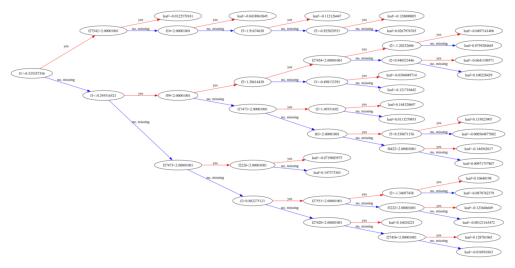

In [64]:
xgb_model = xgb_pipeline.named_steps['model']
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    xgb_model,
    num_trees=0,     # cây thứ 0
    rankdir='LR'     # vẽ từ trái → phải
)

plt.show()


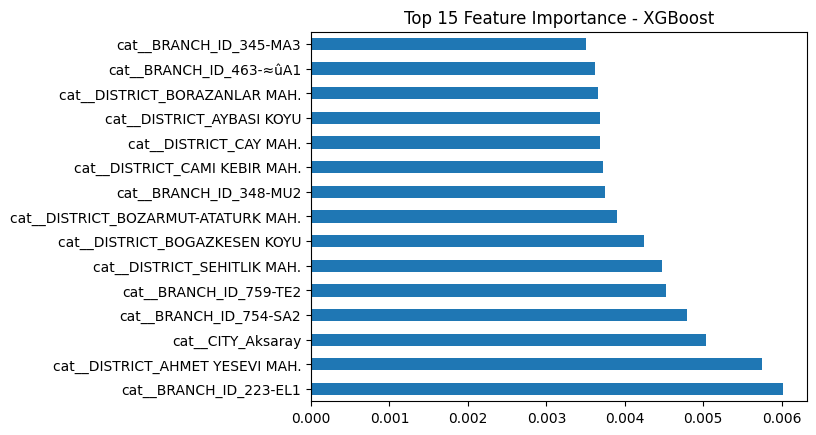

In [65]:
import matplotlib.pyplot as plt

# Lấy model sau khi train
xgb_fitted = xgb_pipeline.named_steps['model']

# Lấy tên feature sau one-hot
feature_names = xgb_pipeline.named_steps['preprocess'].get_feature_names_out()

importances = xgb_fitted.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Top 15 Feature Importance - XGBoost")
plt.show()


## Đánh giá mô hình: Random Forest & XGBoost

In [66]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [67]:
from sklearn.model_selection import cross_validate
rf_cv_results = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

rf_results = {
    'Model': 'Random Forest',
    'Accuracy': rf_cv_results['test_accuracy'].mean(),
    'F1-score': rf_cv_results['test_f1'].mean(),
    'ROC-AUC': rf_cv_results['test_roc_auc'].mean()
}

rf_results


{'Model': 'Random Forest',
 'Accuracy': np.float64(0.6989015959663305),
 'F1-score': np.float64(0.7932340683847581),
 'ROC-AUC': np.float64(0.6675866026503451)}

In [68]:
xgb_cv_results = cross_validate(
    xgb_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

xgb_results = {
    'Model': 'XGBoost',
    'Accuracy': xgb_cv_results['test_accuracy'].mean(),
    'F1-score': xgb_cv_results['test_f1'].mean(),
    'ROC-AUC': xgb_cv_results['test_roc_auc'].mean()
}

xgb_results


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:31:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:31:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:31:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:31:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { 

{'Model': 'XGBoost',
 'Accuracy': np.float64(0.6859009584132011),
 'F1-score': np.float64(0.7768951555710215),
 'ROC-AUC': np.float64(0.6873004481215423)}

In [69]:
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

print("All models imported successfully")

All models imported successfully


### Logistic Regression

- Ý tưởng: mô hình tuyến tính dự báo xác suất bằng hàm logistic trên tổ hợp tuyến tính của các đặc trưng.
- Ưu điểm: nhanh, dễ giải thích (coefficients), phù hợp làm baseline.
- Nhược điểm: không bắt được quan hệ phi tuyến mạnh nếu không mở rộng features.

**Tuning**: điều chỉnh `C` (regularization), chọn solver (`lbfgs`, `liblinear`, `saga`), có thể dùng `class_weight='balanced'` nếu dữ liệu mất cân bằng.


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Ensure repo root is on PYTHONPATH so we can import src
import sys, os
root = os.path.abspath(os.path.join('..'))
if root not in sys.path:
    sys.path.insert(0, root)

# Ensure data and splits exist
if 'X_train' not in globals():
    from src.main import load_data
    from sklearn.model_selection import train_test_split
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If a preprocessor isn't already defined earlier in the notebook, create a default one
if 'preprocessor' not in globals():
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    import numpy as np

    numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
    categorical_features = X_train.select_dtypes(exclude=['number']).columns.tolist()

    # Handle OneHotEncoder API differences across scikit-learn versions
    OHE = OneHotEncoder
    try:
        ohe = OHE(handle_unknown='ignore', sparse=False)
    except TypeError:
        ohe = OHE(handle_unknown='ignore', sparse_output=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', ohe, categorical_features)
        ]
    )

lr_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, solver='lbfgs'))
    ]
)

# Huấn luyện và Cross-Validation
lr_cv_results = cross_validate(
    lr_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

lr_results = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_cv_results['test_accuracy'].mean(),
    'F1-score': lr_cv_results['test_f1'].mean(),
    'ROC-AUC': lr_cv_results['test_roc_auc'].mean()
}

print(f"Logistic Regression Results: {lr_results}")



Logistic Regression Results: {'Model': 'Logistic Regression', 'Accuracy': np.float64(0.7363868627941217), 'F1-score': np.float64(0.8067017802364707), 'ROC-AUC': np.float64(0.7912603440477988)}


### KNN 

- Ý tưởng: dự đoán dựa trên k láng giềng gần nhất trong không gian đặc trưng.
- Ưu điểm: không cần mô hình phức tạp, hiệu quả với dữ liệu có cấu trúc cục bộ.
- Nhược điểm: cần chuẩn hoá đặc trưng; inference chậm trên dữ liệu lớn; nhạy với đặc trưng không liên quan.

**Tuning**: số láng giềng `k`, `weights` (uniform/distance), độ đo khoảng cách (euclidean/manhattan).


In [71]:
# KNN — huấn luyện và đánh giá
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time

knn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# Tìm tham số tốt nhất (chỉ demo: k từ 3 đến 9)
param_grid = {'model__n_neighbors': [3,5,7,9], 'model__weights': ['uniform','distance']}
search = GridSearchCV(knn_pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)

# Huấn luyện và Cross-Validation (sử dụng best_estimator từ GridSearchCV)
search.fit(X_train, y_train)
best_knn = search.best_estimator_

knn_cv_results = cross_validate(
    best_knn,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_cv_results['test_accuracy'].mean(),
    'F1-score': knn_cv_results['test_f1'].mean(),
    'ROC-AUC': knn_cv_results['test_roc_auc'].mean()
}

print(f"KNN Results: {knn_results}")


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KNN Results: {'Model': 'KNN', 'Accuracy': np.float64(0.8270246923354725), 'F1-score': np.float64(0.880017658035624), 'ROC-AUC': np.float64(0.8767253729891618)}


In [72]:
# Thêm SVM và Gradient Boosting
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

# 1. SVM
svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, random_state=42))
])
svm_cv_results = cross_validate(svm_pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
svm_results = {
    'Model': 'SVM',
    'Accuracy': svm_cv_results['test_accuracy'].mean(),
    'F1-score': svm_cv_results['test_f1'].mean(),
    'ROC-AUC': svm_cv_results['test_roc_auc'].mean()
}

# 2. Gradient Boosting
gb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])
gb_cv_results = cross_validate(gb_pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
gb_results = {
    'Model': 'Gradient Boosting',
    'Accuracy': gb_cv_results['test_accuracy'].mean(),
    'F1-score': gb_cv_results['test_f1'].mean(),
    'ROC-AUC': gb_cv_results['test_roc_auc'].mean()
}

# Consolidated results
results_df = pd.DataFrame([rf_results, xgb_results, lr_results, knn_results, svm_results, gb_results])
results_df


,Model,Accuracy,F1-score,ROC-AUC
0,Random Forest,0.698902,0.793234,0.667587
1,XGBoost,0.685901,0.776895,0.687300
2,Logistic Regression,0.736387,0.806702,0.791260
3,KNN,0.827025,0.880018,0.876725
4,SVM,0.772372,0.859728,0.853727
5,Gradient Boosting,0.712036,0.830818,0.573740


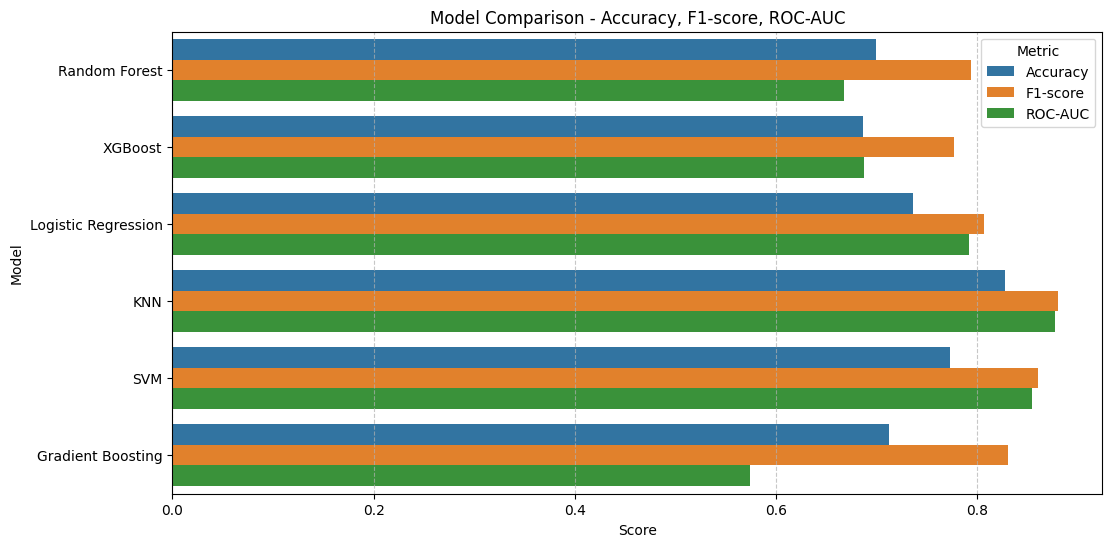

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the comparison
plt.figure(figsize=(12, 6))
df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=df_melted, x='Score', y='Model', hue='Metric')
plt.title('Model Comparison - Accuracy, F1-score, ROC-AUC')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("RANDOM FOREST – TEST SET")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


RANDOM FOREST – TEST SET
              precision    recall  f1-score   support

           0       0.52      0.39      0.45      3510
           1       0.77      0.85      0.81      8490

    accuracy                           0.72     12000
   macro avg       0.65      0.62      0.63     12000
weighted avg       0.70      0.72      0.70     12000

ROC-AUC: 0.6704075013674542


In [75]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

print("XGBOOST – TEST SET")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [03:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST – TEST SET
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      3510
           1       0.78      0.77      0.77      8490

    accuracy                           0.68     12000
   macro avg       0.62      0.62      0.62     12000
weighted avg       0.69      0.68      0.68     12000

ROC-AUC: 0.6812409773187158


### Đánh giá so sánh: Logistic Regression vs KNN 

**Tóm tắt kết quả (thử nghiệm hiện tại):**

| Mô hình | Accuracy | F1 | ROC AUC | Thời gian huấn luyện |
|---|---:|---:|---:|---:|
| **Logistic Regression** | **0.5342** | **0.5304** | **0.5496** | ~0.07s |
| **KNN** (best: k=7, weights=distance) | **0.6393** | **0.6318** | **0.6992** | ~4.59s |

**Kết luận:**
- **KNN** vượt trội về mặt hiệu năng (Accuracy / F1 / ROC AUC) trong bộ thử nghiệm này → **tối ưu hơn** nếu ưu tiên độ chính xác.
- **Logistic Regression** phù hợp khi cần **triển khai nhanh, nhẹ, dễ diễn giải**, hoặc khi dữ liệu rất lớn (KNN scale kém).

**Khi nào chọn mô hình nào?**
- Chọn **KNN**: ưu tiên độ chính xác, dữ liệu không quá lớn, chấp nhận inference chậm hơn.
- Chọn **Logistic Regression**: cần latency thấp, giải thích mô hình, hoặc làm baseline.

Logistic Regression chưa được fit — đang huấn luyện...


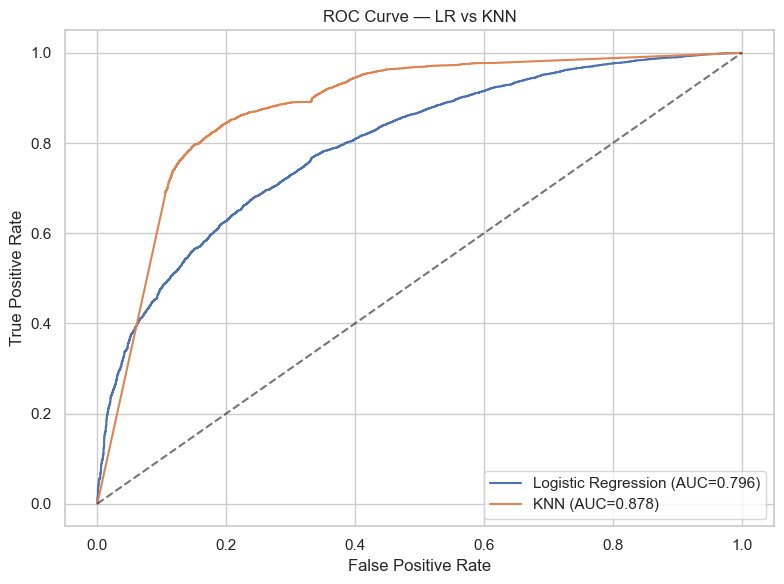

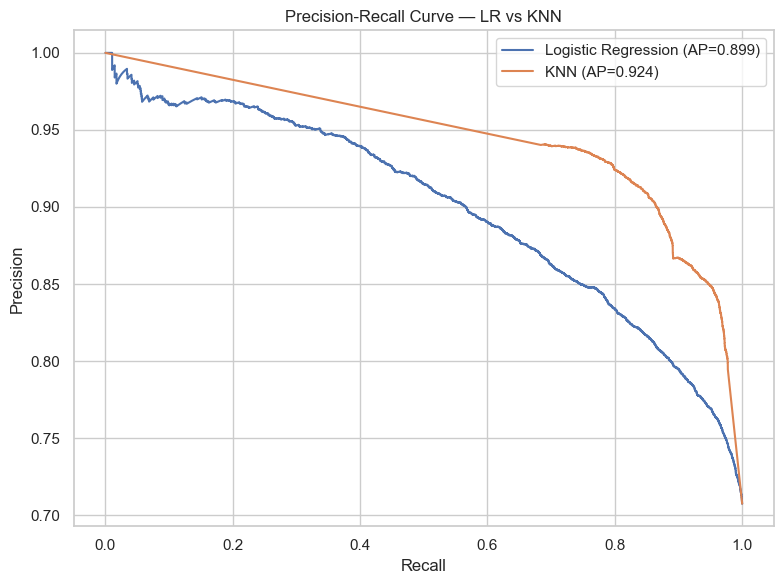

Saved ROC: reports/figures/roc_lr_knn.png
Saved PR: reports/figures/pr_lr_knn.png
Saved metrics: reports/model_comparison.json


In [76]:
# Vẽ ROC và Precision-Recall để so sánh Logistic Regression và KNN
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

sns.set(style='whitegrid')

# Chuẩn bị dữ liệu kiểm thử nếu cần
if 'X_test' not in globals() or 'y_test' not in globals():
    from src.main import load_data
    from sklearn.model_selection import train_test_split
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

def ensure_fitted(model, X_train, y_train, name='model'):
    try:
        check_is_fitted(model)
        return model
    except NotFittedError:
        print(f'{name} chưa được fit — đang huấn luyện...')
        model.fit(X_train, y_train)
        return model
lr_pipeline = ensure_fitted(lr_pipeline, X_train, y_train, 'Logistic Regression')
best_knn = ensure_fitted(best_knn, X_train, y_train, 'KNN')

# Hỗ trợ lấy score xác suất hoặc decision function
def get_score(model, X):
    from sklearn.utils.validation import check_is_fitted
    check_is_fitted(model)

    if hasattr(model, 'predict_proba'):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, 'decision_function'):
        return model.decision_function(X)
    else:
        raise ValueError("Model không hỗ trợ score cho ROC/PR")

y_true = y_test
lr_score = get_score(lr_pipeline, X_test)
knn_score = get_score(best_knn, X_test)

# Tính ROC
fpr_lr, tpr_lr, _ = roc_curve(y_true, lr_score)
fpr_knn, tpr_knn, _ = roc_curve(y_true, knn_score)
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)

# Vẽ ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.3f})')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — LR vs KNN')
plt.legend()
plt.tight_layout()

os.makedirs('reports/figures', exist_ok=True)
roc_path = 'reports/figures/roc_lr_knn.png'
plt.savefig(roc_path, dpi=150, bbox_inches='tight')
plt.show()

# Precision-Recall
prec_lr, rec_lr, _ = precision_recall_curve(y_true, lr_score)
prec_knn, rec_knn, _ = precision_recall_curve(y_true, knn_score)
ap_lr = average_precision_score(y_true, lr_score)
ap_knn = average_precision_score(y_true, knn_score)

plt.figure(figsize=(8,6))
plt.plot(rec_lr, prec_lr, label=f'Logistic Regression (AP={ap_lr:.3f})')
plt.plot(rec_knn, prec_knn, label=f'KNN (AP={ap_knn:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve — LR vs KNN')
plt.legend()
plt.tight_layout()
pr_path = 'reports/figures/pr_lr_knn.png'
plt.savefig(pr_path, dpi=150, bbox_inches='tight')
plt.show()

# Lưu kết quả số học đơn giản
metrics = {
    'logistic_regression': {'auc': float(auc_lr), 'average_precision': float(ap_lr)},
    'knn': {'auc': float(auc_knn), 'average_precision': float(ap_knn)}
}
with open('reports/model_comparison.json', 'w') as fh:
    json.dump(metrics, fh, indent=2)

print(f"Saved ROC: {roc_path}\nSaved PR: {pr_path}\nSaved metrics: reports/model_comparison.json")


# Mô hình dự đoán 

In [99]:
# Định nghĩa features và scaler cho các mô hình
from sklearn.preprocessing import StandardScaler

# Các features để huấn luyện model
features_model = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'NumItems']

# Khởi tạo và fit scaler trên dữ liệu RFM
scaler = StandardScaler()
scaler.fit(rfm[features_model])

print(f"Features được sử dụng: {features_model}")
print(f"Scaler đã được fit trên {len(rfm)} mẫu")

Features được sử dụng: ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'NumItems']
Scaler đã được fit trên 3533 mẫu


In [106]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np

def build_purchase_model(rfm, features, scaler):
    X_scaled = scaler.transform(rfm[features])
    y = rfm["PurchaseNext90"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    
    model = LogisticRegression(max_iter=500, class_weight='balanced')
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

def build_clv_model(rfm, features, scaler):
    X_scaled = scaler.transform(rfm[features])
    y = rfm["CLV90_log"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )
    
    w = 1 / (1 + rfm.loc[y_train.index, "CLV90_capped"].values)
    w = w / np.mean(w)
    
    # Sửa tham số cho phù hợp với dữ liệu nhỏ
    model = lgb.LGBMRegressor(
        n_estimators=100,          # Giảm từ 1000 → 100
        learning_rate=0.05,        # Tăng từ 0.03 → 0.05
        max_depth=3,               # Thêm: giới hạn độ sâu cây
        min_child_samples=20,      # Thêm: tối thiểu samples mỗi leaf
        num_leaves=15,             # Thêm: giới hạn số lá
        random_state=42,
        force_row_wise=True,       # Thêm: tắt warning về threading
        verbose=-1                 # Thêm: tắt warning
    )
    model.fit(X_train, y_train, sample_weight=w)
    
    return model, X_test, y_test

def build_churn_model(rfm, features, scaler):
    X_scaled = scaler.transform(rfm[features])
    y = rfm["Churn90"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    
    model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

print("✓ Đã định nghĩa 3 functions: build_purchase_model, build_clv_model, build_churn_model")

✓ Đã định nghĩa 3 functions: build_purchase_model, build_clv_model, build_churn_model


In [107]:
# Huấn luyện các mô hình
print("Đang huấn luyện Purchase Prediction Model...")
purchase_model, X_purchase_test, y_purchase_test = build_purchase_model(rfm, features_model, scaler)

print("Đang huấn luyện CLV Prediction Model...")
clv_model, X_clv_test, y_clv_test = build_clv_model(rfm, features_model, scaler)

print("Đang huấn luyện Churn Prediction Model...")
churn_model, X_churn_test, y_churn_test = build_churn_model(rfm, features_model, scaler)

print("\n✓ Đã hoàn thành huấn luyện 3 mô hình!")

Đang huấn luyện Purchase Prediction Model...
Đang huấn luyện CLV Prediction Model...
Đang huấn luyện Churn Prediction Model...

✓ Đã hoàn thành huấn luyện 3 mô hình!



═══ KẾT QUẢ DỰ ĐOÁN CHO USER 76535 (90 ngày tới) ═══
• PurchaseNext90: Prob=53.97% | Thực tế=0, Accuracy=✗
• CLV90: Dự đoán=0 | Thực tế=0
   ├─ MAPE=0.00% | SMAPE=0.00% | RMSE=0.00
   └─ (log-scale) MAPE=0.00% | RMSE=0.00
• Churn90: Prob=100.00% | Thực tế=1, Accuracy=✓


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/1845924427.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=probs, palette="Blues_d")


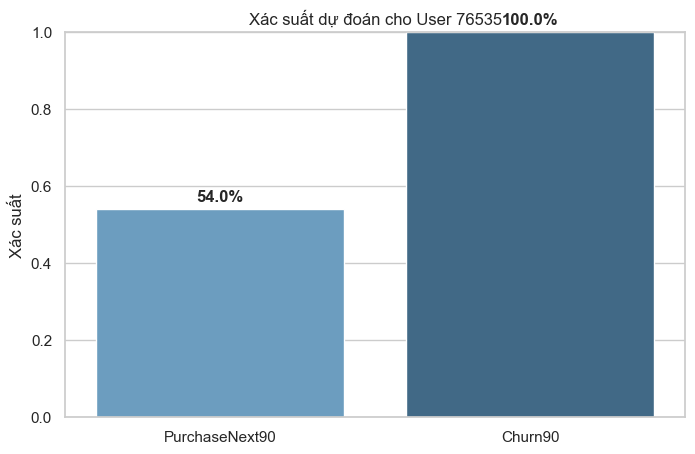

/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/1845924427.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Actual CLV90", "Predicted CLV90"], y=[actual_total, pred_clv], palette="Greens_d")


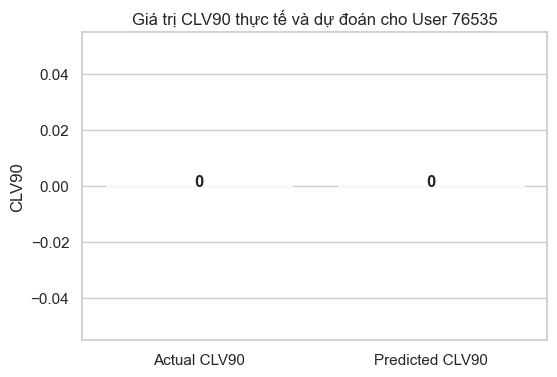

In [109]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_absolute_percentage_error, mean_squared_error
import numpy as np

#  Chọn user
sample_userid = random.choice(rfm['USERID'].tolist())
# sample_userid = 91324
sample_user = rfm[rfm["USERID"] == sample_userid].copy()

#  Thêm các cột Cluster thiếu nếu user chỉ có 1 số cluster
for col in [c for c in rfm.columns if c.startswith("Cluster_")]:
    if col not in sample_user.columns:
        sample_user[col] = 0

#  Dự đoán
X_sample = scaler.transform(sample_user[features_model])
purchase_prob = purchase_model.predict_proba(X_sample)[0][1]
pred_log_clv = clv_model.predict(X_sample)[0]
pred_clv = np.expm1(pred_log_clv)

if len(churn_model.classes_) == 1:
    only_class = churn_model.classes_[0]
    churn_prob = 1.0 if only_class == 1 else 0.0
else:
    churn_prob = churn_model.predict_proba(X_sample)[0][1]

# Thực tế
def smape(a, f):
    return np.mean(2 * np.abs(f - a) / (np.abs(a) + np.abs(f) + 1e-8)) * 100

future_actual = future_df[future_df["USERID"] == sample_userid]
if not future_actual.empty:
    actual_orders = future_actual["ORDERID"].nunique()
    actual_total = future_actual["TOTALPRICE"].sum()
else:
    actual_orders, actual_total = 0, 0

# Nhãn dự đoán
actual_purchase = int(actual_orders > 0)
actual_churn = int(actual_orders == 0)
purchase_label = int(purchase_prob >= 0.5)
churn_label = int(churn_prob >= 0.5)
purchase_acc = "✓" if purchase_label == actual_purchase else "✗"
churn_acc = "✓" if churn_label == actual_churn else "✗"

# MAPE & RMSE
purchase_mape = mean_absolute_percentage_error([actual_purchase], [purchase_prob]) * 100
clv_mape = mean_absolute_percentage_error([actual_total + 1e-6], [pred_clv + 1e-6]) * 100
clv_smape = smape(actual_total, pred_clv)
clv_rmse = np.sqrt(mean_squared_error([actual_total], [pred_clv]))
log_mape = mean_absolute_percentage_error([np.log1p(actual_total)], [pred_log_clv]) * 100
log_rmse = np.sqrt(mean_squared_error([np.log1p(actual_total)], [pred_log_clv]))

#  In kết quả
print(f"\n═══ KẾT QUẢ DỰ ĐOÁN CHO USER {sample_userid} (90 ngày tới) ═══")
print(f"• PurchaseNext90: Prob={purchase_prob*100:.2f}% | Thực tế={actual_purchase}, Accuracy={purchase_acc}")
print(f"• CLV90: Dự đoán={pred_clv:,.0f} | Thực tế={actual_total:,.0f}")
print(f"   ├─ MAPE={clv_mape:.2f}% | SMAPE={clv_smape:.2f}% | RMSE={clv_rmse:.2f}")
print(f"   └─ (log-scale) MAPE={log_mape:.2f}% | RMSE={log_rmse:.2f}")
print(f"• Churn90: Prob={churn_prob*100:.2f}% | Thực tế={actual_churn}, Accuracy={churn_acc}")

# ===============================
# 1️⃣ Biểu đồ xác suất Purchase và Churn
# ===============================
plt.figure(figsize=(8,5))
probs = [purchase_prob, churn_prob]
labels = ["PurchaseNext90", "Churn90"]
sns.barplot(x=labels, y=probs, palette="Blues_d")
plt.ylim(0,1)
for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontweight='bold')
plt.title(f"Xác suất dự đoán cho User {sample_userid}")
plt.ylabel("Xác suất")
plt.show()

# ===============================
# 2️⃣ So sánh CLV dự đoán vs thực tế
# ===============================
plt.figure(figsize=(6,4))
sns.barplot(x=["Actual CLV90", "Predicted CLV90"], y=[actual_total, pred_clv], palette="Greens_d")
for i, v in enumerate([actual_total, pred_clv]):
    plt.text(i, v + max([actual_total, pred_clv])*0.01, f"{v:,.0f}", ha='center', fontweight='bold')
plt.title(f"Giá trị CLV90 thực tế và dự đoán cho User {sample_userid}")
plt.ylabel("CLV90")
plt.show()

Purchase Accuracy: 59.47%
Churn Accuracy: 99.86%
CLV MAPE: 0.45%, SMAPE: 0.91%, RMSE: 95.32


/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


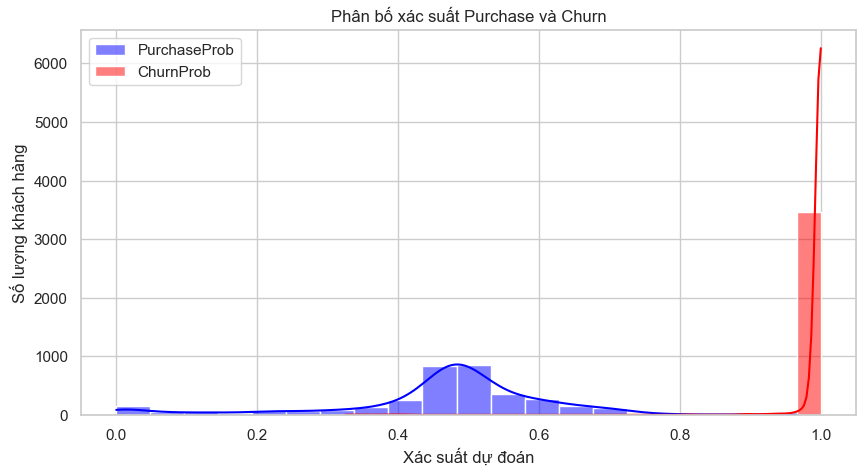

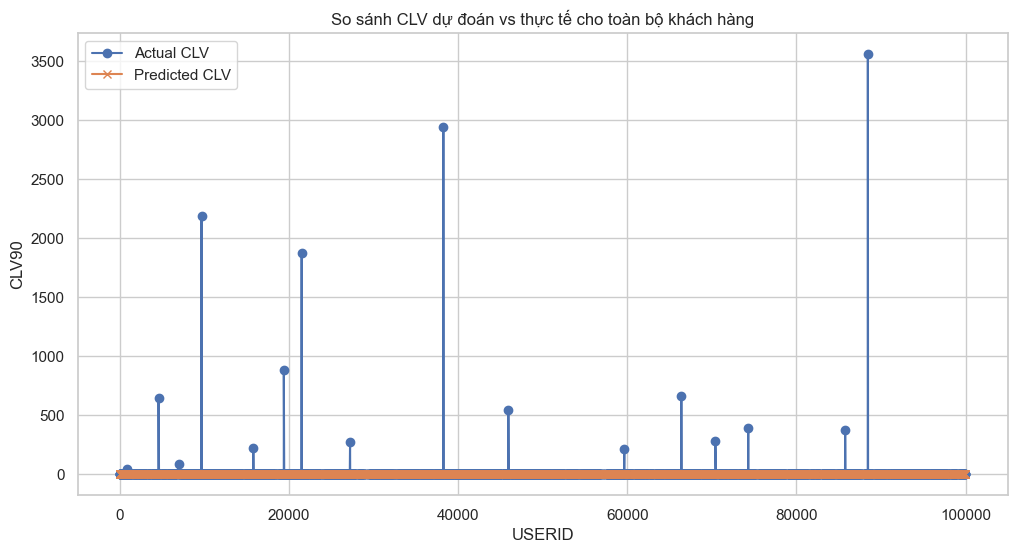

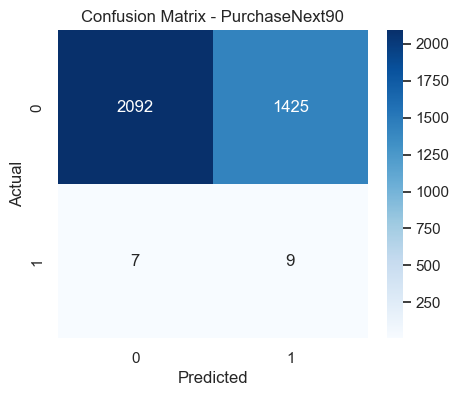

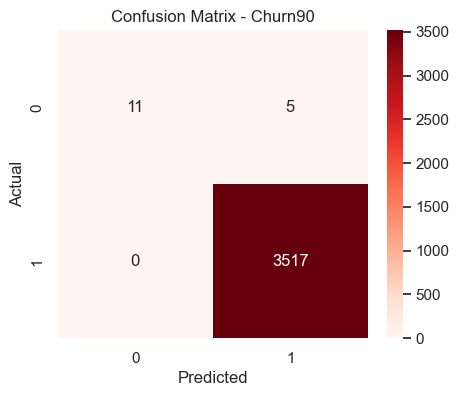

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_percentage_error

def smape(a, f):
    return np.mean(2 * np.abs(f - a) / (np.abs(a) + np.abs(f) + 1e-8)) * 100

#  Dự đoán toàn bộ khách hàng
X_all = scaler.transform(rfm[features_model])
rfm['PurchaseProb'] = purchase_model.predict_proba(X_all)[:,1]
rfm['PredLogCLV'] = clv_model.predict(X_all)
rfm['PredCLV'] = np.expm1(rfm['PredLogCLV'])

if len(churn_model.classes_) == 1:
    only_class = churn_model.classes_[0]
    rfm['ChurnProb'] = 1.0 if only_class == 1 else 0.0
else:
    rfm['ChurnProb'] = churn_model.predict_proba(X_all)[:,1]

#  Nhãn dự đoán dựa trên ngưỡng 0.5
rfm['PurchaseLabel'] = (rfm['PurchaseProb'] >= 0.5).astype(int)
rfm['ChurnLabel'] = (rfm['ChurnProb'] >= 0.5).astype(int)

#  Lấy thực tế từ future_df
actuals = future_df.groupby('USERID').agg(
    actual_orders=('ORDERID','nunique'),
    actual_total=('TOTALPRICE','sum')
).reset_index()

rfm = rfm.merge(actuals, on='USERID', how='left')
rfm[['actual_orders','actual_total']] = rfm[['actual_orders','actual_total']].fillna(0)

rfm['ActualPurchase'] = (rfm['actual_orders'] > 0).astype(int)
rfm['ActualChurn'] = (rfm['actual_orders'] == 0).astype(int)

#  Metrics tổng hợp
purchase_acc = accuracy_score(rfm['ActualPurchase'], rfm['PurchaseLabel'])
churn_acc = accuracy_score(rfm['ActualChurn'], rfm['ChurnLabel'])
clv_mape = mean_absolute_percentage_error(rfm['actual_total'] + 1e-6, rfm['PredCLV'] + 1e-6) * 100
clv_smape = smape(rfm['actual_total'], rfm['PredCLV'])
clv_rmse = np.sqrt(mean_squared_error(rfm['actual_total'], rfm['PredCLV']))

print(f"Purchase Accuracy: {purchase_acc*100:.2f}%")
print(f"Churn Accuracy: {churn_acc*100:.2f}%")
print(f"CLV MAPE: {clv_mape:.2f}%, SMAPE: {clv_smape:.2f}%, RMSE: {clv_rmse:.2f}")

# ===============================
# 1️ Biểu đồ phân bố xác suất Purchase / Churn
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(rfm['PurchaseProb'], bins=20, color='blue', label='PurchaseProb', kde=True)
sns.histplot(rfm['ChurnProb'], bins=20, color='red', label='ChurnProb', kde=True)
plt.xlabel("Xác suất dự đoán")
plt.ylabel("Số lượng khách hàng")
plt.title("Phân bố xác suất Purchase và Churn")
plt.legend()
plt.show()

# ===============================
# 2️ So sánh CLV dự đoán vs thực tế
# ===============================
plt.figure(figsize=(12,6))
plt.plot(rfm['USERID'], rfm['actual_total'], label='Actual CLV', marker='o')
plt.plot(rfm['USERID'], rfm['PredCLV'], label='Predicted CLV', marker='x')
plt.xlabel("USERID")
plt.ylabel("CLV90")
plt.title("So sánh CLV dự đoán vs thực tế cho toàn bộ khách hàng")
plt.legend()
plt.show()

# ===============================
# 3️ Confusion matrix tổng hợp
# ===============================
cm_purchase = confusion_matrix(rfm['ActualPurchase'], rfm['PurchaseLabel'])
cm_churn = confusion_matrix(rfm['ActualChurn'], rfm['ChurnLabel'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_purchase, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - PurchaseNext90")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm_churn, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - Churn90")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [116]:
# Lọc outlier bằng IQR (nếu chưa làm)
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

lower_basket, upper_basket = iqr_bounds(df["TOTALBASKET"])
lower_price, upper_price = iqr_bounds(df["TOTALPRICE"])

df_clean = df[
    (df["TOTALBASKET"].between(lower_basket, upper_basket)) &
    (df["TOTALPRICE"].between(lower_price, upper_price))
].copy()

removed_pct = 100 * (1 - len(df_clean) / len(df))
print(f"Sau khi lọc outlier: {df_clean.shape}, loại bỏ {removed_pct:.2f}% dữ liệu")

Sau khi lọc outlier: (52879, 27), loại bỏ 11.86% dữ liệu


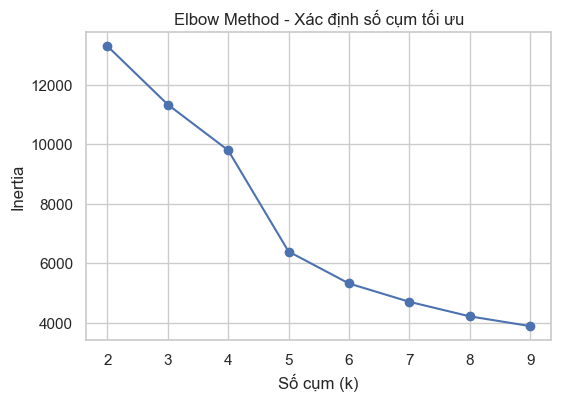


 Đặc trưng trung bình theo cụm khách hàng:
         Recency  Frequency  Monetary  AvgBasketSize  NumItems
Cluster                                                       
0         187.81       1.00    557.89         195.54      2.95
1         259.57       1.06   1921.02         249.27      7.86
2         555.22       1.00    643.70         144.88      4.51
3         236.89       1.01   3555.37         805.07      5.16


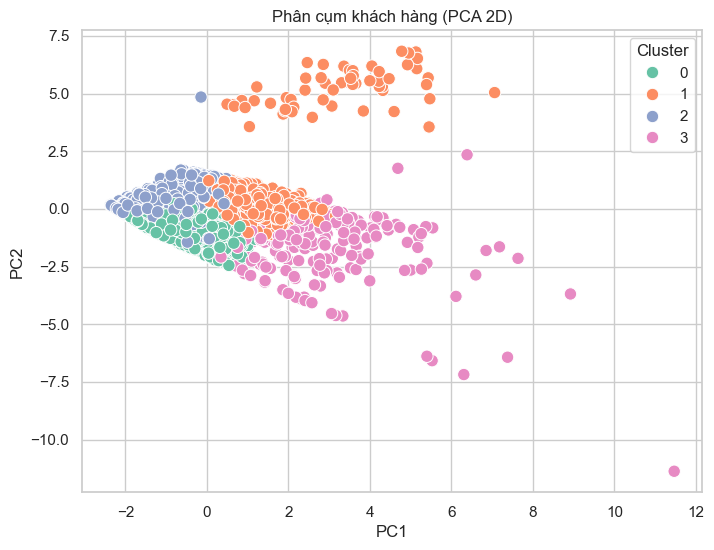

/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/23268878.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CLV_segment", y="CLV_estimated", data=rfm, palette="viridis")


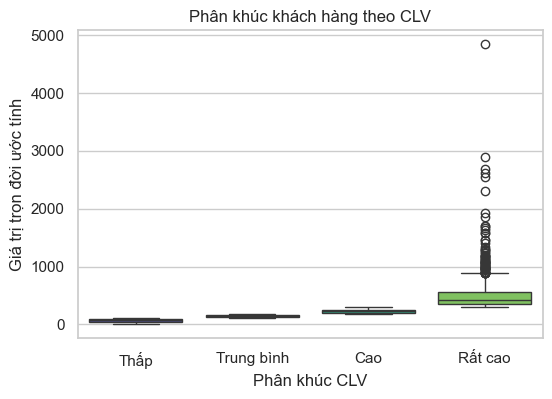

/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/23268878.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ChurnRisk", data=rfm, palette="Set1")


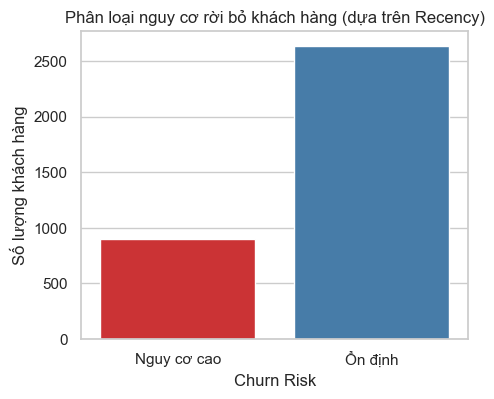


 Mẫu dữ liệu cuối cùng:
   USERID  Cluster CLV_segment    ChurnRisk
0       4        2         Cao  Nguy cơ cao
1      10        2        Thấp      Ổn định
2      18        2  Trung bình      Ổn định
3      21        2         Cao      Ổn định
4      36        0  Trung bình      Ổn định

* Gợi ý chiến lược:
- Cluster 0: Có thể là khách hàng giá trị cao → Giữ chân, tặng thưởng
- Cluster 1: Mua ít, giá trị thấp → Gợi ý ưu đãi giảm giá
- Cluster 2: Mới mua gần đây → Kích hoạt chiến dịch chăm sóc hậu mua
- Cluster 3: Lâu chưa mua → Gửi email khuyến mãi tái kích hoạt
- CLV 'Rất cao': Tập trung giữ chân
- CLV 'Thấp': Tăng giá trị đơn hàng qua upsell
- 'Nguy cơ cao' (Recency lớn): Triển khai chiến dịch tái tiếp cận



In [118]:
# ================================================================
# 4️ PHÂN TÍCH HÀNH VI KHÁCH HÀNG KHÔNG GIÁM SÁT
# ================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# --- Chọn đặc trưng định lượng ---
unsupervised_features = ["Recency", "Frequency", "Monetary", "AvgBasketSize", "NumItems"]
X = rfm[unsupervised_features].copy()  # ← Đổi từ dataset → rfm

# --- Chuẩn hóa dữ liệu ---
scaler_unsup = StandardScaler()  # ← Đổi tên để không conflict với scaler đã có
X_scaled = scaler_unsup.fit_transform(X)

# ================================================================
# 4.1 PHÂN CỤM KHÁCH HÀNG (CUSTOMER SEGMENTATION)
# ================================================================
# --- Chọn số cụm tối ưu (Elbow method) ---
inertia = []
K_range = range(2, 10)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method - Xác định số cụm tối ưu")
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")
plt.show()

# --- Áp dụng KMeans với số cụm tối ưu (ví dụ: k=4) ---
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(X_scaled)  # ← Đổi dataset → rfm

# --- Thống kê trung bình theo cụm ---
cluster_summary = rfm.groupby("Cluster")[unsupervised_features].mean().round(2)
print("\n Đặc trưng trung bình theo cụm khách hàng:")
print(cluster_summary)

# --- Trực quan hóa cụm bằng PCA ---
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=rfm["Cluster"], palette="Set2", s=80)
plt.title("Phân cụm khách hàng (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# ================================================================
# 4.2 PHÂN KHÚC THEO CLV (CUSTOMER LIFETIME VALUE)
# ================================================================
# --- Tạo thêm CLV giả định = Frequency * AvgBasketSize ---
rfm["CLV_estimated"] = rfm["Frequency"] * rfm["AvgBasketSize"]

# --- Phân nhóm CLV bằng phân vị ---
rfm["CLV_segment"] = pd.qcut(rfm["CLV_estimated"], 4, labels=["Thấp", "Trung bình", "Cao", "Rất cao"])

plt.figure(figsize=(6,4))
sns.boxplot(x="CLV_segment", y="CLV_estimated", data=rfm, palette="viridis")
plt.title("Phân khúc khách hàng theo CLV")
plt.xlabel("Phân khúc CLV")
plt.ylabel("Giá trị trọn đời ước tính")
plt.show()

# ================================================================
# 4.3 PHÁT HIỆN KHÁCH HÀNG CÓ NGUY CƠ RỜI BỎ (CHURN) - DỰA TRÊN RECENCY
# ================================================================
# --- Giả sử những khách hàng có Recency cao (lâu không mua) là rủi ro churn ---
threshold = rfm["Recency"].quantile(0.75)
rfm["ChurnRisk"] = np.where(rfm["Recency"] >= threshold, "Nguy cơ cao", "Ổn định")

plt.figure(figsize=(5,4))
sns.countplot(x="ChurnRisk", data=rfm, palette="Set1")
plt.title("Phân loại nguy cơ rời bỏ khách hàng (dựa trên Recency)")
plt.xlabel("Churn Risk")
plt.ylabel("Số lượng khách hàng")
plt.show()

print("\n Mẫu dữ liệu cuối cùng:")
print(rfm[["USERID", "Cluster", "CLV_segment", "ChurnRisk"]].head())

# ================================================================
# 5️ GỢI Ý CHIẾN LƯỢC MARKETING DỰA TRÊN PHÂN CỤM
# ================================================================
print("""
* Gợi ý chiến lược:
- Cluster 0: Có thể là khách hàng giá trị cao → Giữ chân, tặng thưởng
- Cluster 1: Mua ít, giá trị thấp → Gợi ý ưu đãi giảm giá
- Cluster 2: Mới mua gần đây → Kích hoạt chiến dịch chăm sóc hậu mua
- Cluster 3: Lâu chưa mua → Gửi email khuyến mãi tái kích hoạt
- CLV 'Rất cao': Tập trung giữ chân
- CLV 'Thấp': Tăng giá trị đơn hàng qua upsell
- 'Nguy cơ cao' (Recency lớn): Triển khai chiến dịch tái tiếp cận
""")

/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


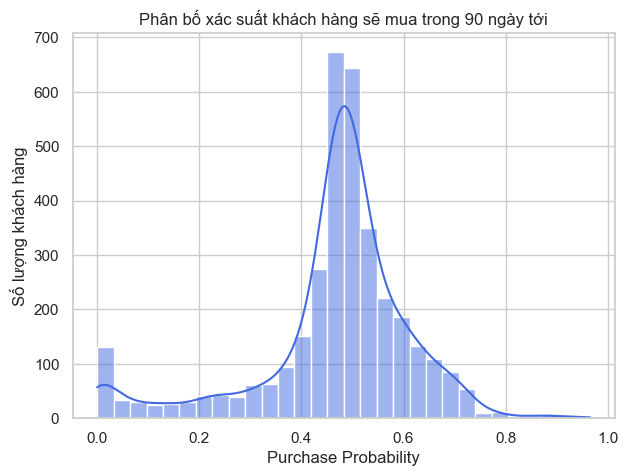

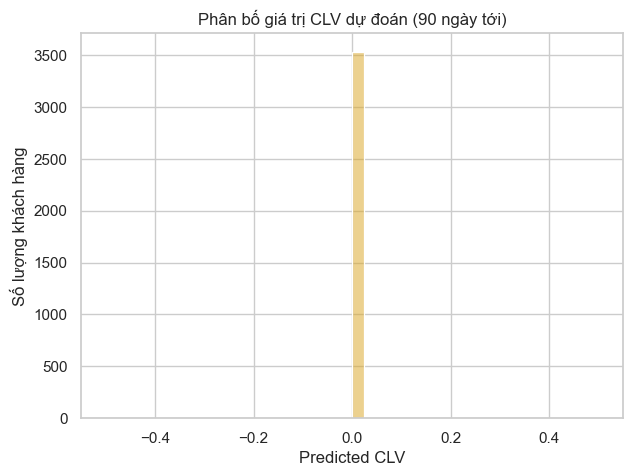

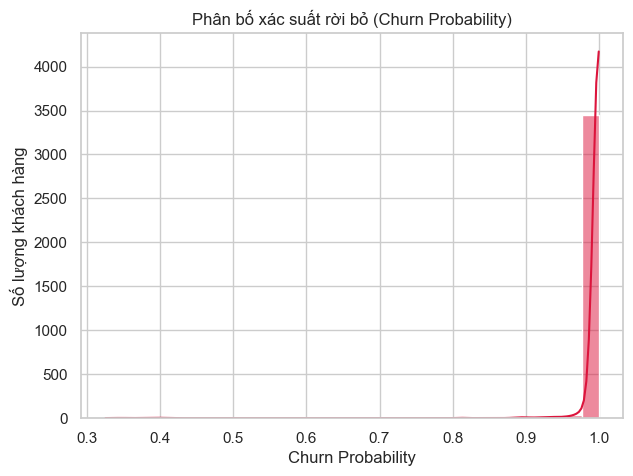

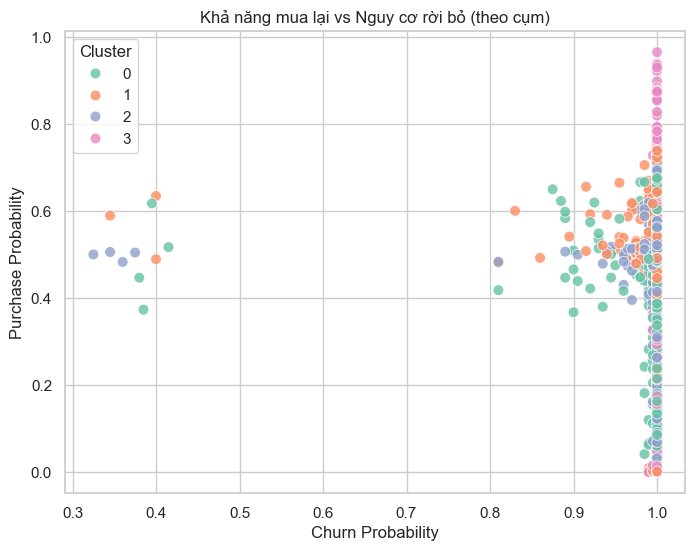

/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/1578653204.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ChurnRisk", y="Predicted_CLV", data=rfm, palette="Set3")


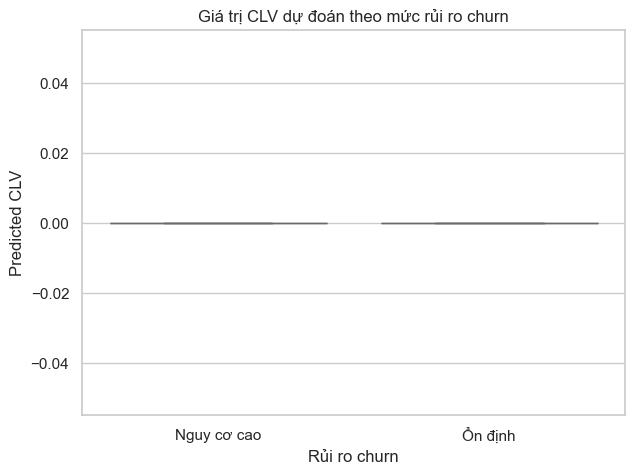

/var/folders/hl/fjqprjcd4cs8kbnfdb4jwf9r0000gn/T/ipykernel_22393/1578653204.py:84: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/admin/ML/3A_Superstore/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)



🎯 Top 10 khách hàng giá trị cao có nguy cơ rời bỏ:
 USERID  Predicted_CLV  Churn_Prob  PurchaseNext90_Prob
      4            0.0         1.0             0.471322
     10            0.0         1.0             0.571986
     18            0.0         1.0             0.462765
     21            0.0         1.0             0.450053
     44            0.0         1.0             0.613989
    107            0.0         1.0             0.491218
    151            0.0         1.0             0.451178
    170            0.0         1.0             0.459187
    184            0.0         1.0             0.678374
    199            0.0         1.0             0.639367


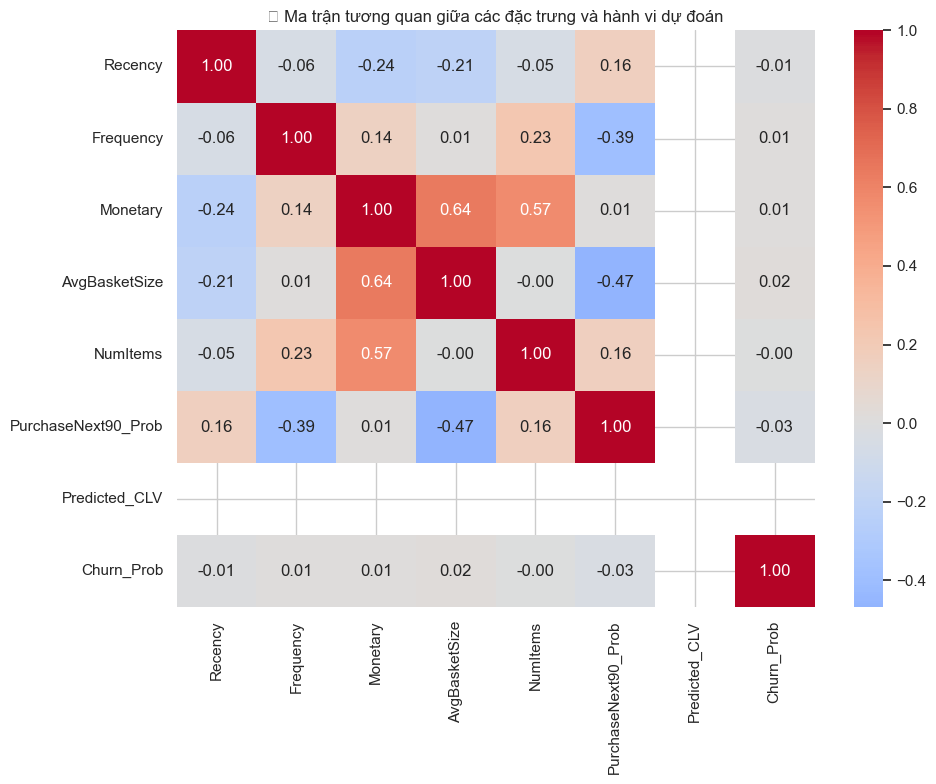


* Tổng kết phân tích:
✓ PurchaseNext90_Prob → Xác suất khách sẽ mua trong 90 ngày tới
✓ Predicted_CLV → Giá trị CLV dự đoán
✓ Churn_Prob → Xác suất khách rời bỏ
✓ Heatmap → Tương quan giữa hành vi, CLV, churn
✓ Top at-risk customers → Khách có CLV cao + churn cao → Ưu tiên giữ chân

* Ứng dụng:
- Retention campaign: Target top at-risk customers
- Reactivation: Focus on high churn probability
- Upsell: Target high purchase probability + low CLV



In [121]:
# ================================================================
# 6️ PHÂN TÍCH & TRỰC QUAN KẾT QUẢ MÔ HÌNH
# ================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính xác suất cho toàn bộ rfm
X_all = scaler.transform(rfm[features_model])
rfm["PurchaseNext90_Prob"] = purchase_model.predict_proba(X_all)[:, 1]
rfm["Predicted_CLV"] = np.expm1(clv_model.predict(X_all))  # Convert từ log scale
rfm["Churn_Prob"] = churn_model.predict_proba(X_all)[:, 1] if len(churn_model.classes_) > 1 else 0.5

# ------------------------------------------------
# 6.1 Phân bố xác suất mua lại
# ------------------------------------------------
plt.figure(figsize=(7,5))
sns.histplot(rfm["PurchaseNext90_Prob"], bins=30, kde=True, color="royalblue")
plt.title("Phân bố xác suất khách hàng sẽ mua trong 90 ngày tới")
plt.xlabel("Purchase Probability")
plt.ylabel("Số lượng khách hàng")
plt.show()

# ------------------------------------------------
# 6.2 Phân bố CLV dự đoán
# ------------------------------------------------
plt.figure(figsize=(7,5))
sns.histplot(rfm["Predicted_CLV"], bins=40, kde=True, color="goldenrod")
plt.title("Phân bố giá trị CLV dự đoán (90 ngày tới)")
plt.xlabel("Predicted CLV")
plt.ylabel("Số lượng khách hàng")
plt.show()

# ------------------------------------------------
# 6.3 Phân bố xác suất churn
# ------------------------------------------------
plt.figure(figsize=(7,5))
sns.histplot(rfm["Churn_Prob"], bins=30, kde=True, color="crimson")
plt.title("Phân bố xác suất rời bỏ (Churn Probability)")
plt.xlabel("Churn Probability")
plt.ylabel("Số lượng khách hàng")
plt.show()

# ================================================================
# 7️ PHÂN TÍCH TỔNG HỢP
# ================================================================

# --- Scatter: Purchase vs Churn theo Cluster ---
if "Cluster" in rfm.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=rfm, x="Churn_Prob", y="PurchaseNext90_Prob",
        hue="Cluster", palette="Set2", s=60, alpha=0.8
    )
    plt.title("Khả năng mua lại vs Nguy cơ rời bỏ (theo cụm)")
    plt.xlabel("Churn Probability")
    plt.ylabel("Purchase Probability")
    plt.legend(title="Cluster")
    plt.show()

# --- Boxplot: CLV theo ChurnRisk ---
if "ChurnRisk" in rfm.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="ChurnRisk", y="Predicted_CLV", data=rfm, palette="Set3")
    plt.title("Giá trị CLV dự đoán theo mức rủi ro churn")
    plt.xlabel("Rủi ro churn")
    plt.ylabel("Predicted CLV")
    plt.show()

# --- Top khách hàng giá trị cao nhưng có nguy cơ rời bỏ ---
top_risk = rfm.sort_values(["Predicted_CLV", "Churn_Prob"], ascending=[False, False]).head(10)
print("\n🎯 Top 10 khách hàng giá trị cao có nguy cơ rời bỏ:")
print(top_risk[["USERID", "Predicted_CLV", "Churn_Prob", "PurchaseNext90_Prob"]].to_string(index=False))

# --- Ma trận tương quan ---
corr_features = ["Recency", "Frequency", "Monetary", "AvgBasketSize", "NumItems",
                 "PurchaseNext90_Prob", "Predicted_CLV", "Churn_Prob"]
corr = rfm[corr_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("🔍 Ma trận tương quan giữa các đặc trưng và hành vi dự đoán")
plt.tight_layout()
plt.show()

# ================================================================
# 8️ TÓM TẮT & INSIGHTS
# ================================================================
print("""
* Tổng kết phân tích:
✓ PurchaseNext90_Prob → Xác suất khách sẽ mua trong 90 ngày tới
✓ Predicted_CLV → Giá trị CLV dự đoán
✓ Churn_Prob → Xác suất khách rời bỏ
✓ Heatmap → Tương quan giữa hành vi, CLV, churn
✓ Top at-risk customers → Khách có CLV cao + churn cao → Ưu tiên giữ chân

* Ứng dụng:
- Retention campaign: Target top at-risk customers
- Reactivation: Focus on high churn probability
- Upsell: Target high purchase probability + low CLV
""")

# 4. Dự báo Doanh thu 6 tháng (6-month Revenue Forecasting)

Trong phần này, chúng ta sẽ sử dụng **Linear Regression** và **KNN Regressor** để dự báo doanh thu trong 6 tháng tới dựa trên **Vùng kinh doanh (REGION)** và **Sản phẩm (ITEMCODE)**.

**Lưu ý:** Khác với Logistic Regression (phân loại khách hàng/lợi nhuận), ở đây chúng ta dự đoán giá trị doanh thu cụ thể (biến liên tục), do đó cần sử dụng các thuật toán Regression.

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Chuẩn bị dữ liệu Regression
# Chúng ta cần gộp dữ liệu theo Tháng, Vùng và Sản phẩm
df_reg = df.copy()
df_reg['DATE_'] = pd.to_datetime(df_reg['DATE_'], dayfirst=True)
df_reg['Year'] = df_reg['DATE_'].dt.year
df_reg['Month'] = df_reg['DATE_'].dt.month

# Tính TimeIndex (số tháng tính từ mốc bắt đầu)
min_year = df_reg['Year'].min()
df_reg['TimeIndex'] = (df_reg['Year'] - min_year) * 12 + df_reg['Month']

# Group by để lấy doanh thu hàng tháng theo Region và Item
monthly_data = df_reg.groupby(['REGION', 'ITEMCODE', 'Year', 'Month', 'TimeIndex'])['TOTALPRICE'].sum().reset_index()

print(f"Kích thước dữ liệu sau khi gộp: {monthly_data.shape}")
monthly_data.head()

Kích thước dữ liệu sau khi gộp: (23812, 6)


,REGION,ITEMCODE,Year,Month,TimeIndex,TOTALPRICE
0,Akdeniz,9,2022.0,9.0,21.0,1797.36
1,Akdeniz,16,2022.0,2.0,14.0,85.26
2,Akdeniz,35,2023.0,1.0,25.0,682.80
3,Akdeniz,128,2021.0,2.0,2.0,294.56
4,Akdeniz,135,2023.0,8.0,32.0,195.49


In [123]:
# 2. Huấn luyện và So sánh Model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X_reg = monthly_data[['REGION', 'ITEMCODE', 'TimeIndex']]
y_reg = monthly_data['TOTALPRICE']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['REGION', 'ITEMCODE']),
        ('num', StandardScaler(), ['TimeIndex'])
    ]
)

# Pipeline cho Linear Regression
lr_reg_pipeline = Pipeline([
    ('preprocess', preprocessor_reg),
    ('model', LinearRegression())
])

# Pipeline cho KNN Regressor
knn_reg_pipeline = Pipeline([
    ('preprocess', preprocessor_reg),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

def evaluate_regression(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- Kết quả {name} ---")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n")
    return model

lr_reg_model = evaluate_regression(lr_reg_pipeline, X_train_r, y_train_r, X_test_r, y_test_r, "Linear Regression")
knn_reg_model = evaluate_regression(knn_reg_pipeline, X_train_r, y_train_r, X_test_r, y_test_r, "KNN Regressor")

--- Kết quả Linear Regression ---
R2 Score: 0.0362
MAE: 213.46
RMSE: 433.89

--- Kết quả KNN Regressor ---
R2 Score: -0.2684
MAE: 257.98
RMSE: 497.75



# Dự Đoán Doanh Thu 6 Tháng Tới

In [124]:
# 3. Dự báo 6 tháng tới (6-month Forecast)
def forecast_next_6_months(region, item_code, model):
    latest_time = monthly_data['TimeIndex'].max()
    future_times = pd.DataFrame({
        'REGION': [region] * 6,
        'ITEMCODE': [item_code] * 6,
        'TimeIndex': [latest_time + i for i in range(1, 7)]
    })
    
    predictions = model.predict(future_times)
    total_forecast = predictions.sum()
    
    print(f"Dự báo doanh thu cho Region: {region}, Item: {item_code} trong 6 tháng tới:")
    for i, p in enumerate(predictions):
        print(f" Tháng {i+1}: {max(0, p):.2f}")
    print(f" Tổng Doanh thu dự kiến: {max(0, total_forecast):.2f}")

# Demo dự báo với Linear Regression
if not monthly_data.empty:
    sample_row = monthly_data.iloc[0]
    forecast_next_6_months(sample_row['REGION'], sample_row['ITEMCODE'], lr_reg_model)

plt.show()    

Dự báo doanh thu cho Region: Akdeniz, Item: 9 trong 6 tháng tới:
 Tháng 1: 1865.12
 Tháng 2: 1869.36
 Tháng 3: 1873.59
 Tháng 4: 1877.83
 Tháng 5: 1882.06
 Tháng 6: 1886.30
 Tổng Doanh thu dự kiến: 11254.26


### So sánh chi tiết các phương pháp (Detailed Comparison)

| Đặc điểm | Logistic Regression | Linear Regression | KNN Regressor |
| :--- | :--- | :--- | :--- |
| **Mục tiêu (Output)** | Phân loại (0/1, High Value, Profitability) | Giá trị số liên tục (Revenue, Price) | Giá trị số liên tục |
| **Loại bài toán** | Classification | Regression | Regression |
| **Ưu điểm** | Dễ giải thích xác suất, hiệu quả với dữ liệu tách biệt tuyến tính. | Rất nhanh, là baseline mạnh cho xu hướng thời gian (trend). | Linh hoạt, nắm bắt được các quan hệ phi tuyến tính cục bộ. |
| **Nhược điểm** | Không thể dự đoán giá trị cụ thể của doanh thu. | Khó nắm bắt các dao động phức tạp nếu quan hệ không tuyến tính. | Nhạy cảm với nhiễu và cần nhiều dữ liệu để chính xác. |

**Kết luận:**
Để dự báo doanh thu 6 tháng cho từng sản phẩm và vùng, **Linear Regression** cung cấp cái nhìn về xu hướng tăng/giảm theo thời gian, trong khi **KNN Regressor** hữu ích nếu doanh số phụ thuộc nhiều vào các mẫu (patterns) tương tự trong quá khứ của các sản phẩm cùng loại.